# 교수님의 조언에 따라서 시간에 따른 기업 부도 현황에 대해서 간단하게 표현한 코드이다.

In [84]:
import pandas as pd
import numpy as np

,1999-11-01,1999-12-01,2000-01-01,2000-02-01,2000-03-01,2000-04-01,2000-05-01,2000-06-01,2000-07-01,2000-08-01,...,2021-07-01,2021-08-01,2021-09-01,2021-10-01,2021-11-01,2021-12-01,2022-01-01,2022-02-01,2022-03-01,2022-04-01
계정항목,,,,,,,,,,,,,,,,,,,,,
M2,679894.8,672544.4,676895.4,679807.1,684735.3,692399.0,687687.3,683704.8,693645.7,701191.1,...,3439194.8,3489987.3,3503617.5,3563231.3,3596418.3,3613687.6,3629712.4,3657117.3,3652818.7,3673715.3


c:\Users\LG\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\LG\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\LG\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54637 (\N{HANGUL SYLLABLE HANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\LG\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47785 (\N{HANGUL SYLLABLE MOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


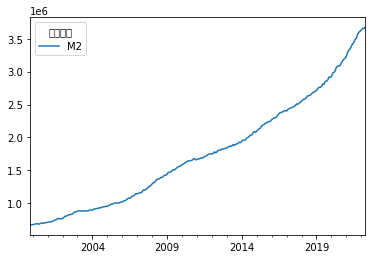

In [114]:
m2 = pd.read_csv('./M2.csv')
m2.drop(['통계표','단위','변환'],axis=1,inplace=True)
m2['계정항목'][0] = 'M2'
m2.set_index('계정항목',inplace=True)
m2.columns = pd.to_datetime(m2.columns)

for i in m2.columns:
    m2[i]=m2[i].apply(lambda x:x.replace(',',''))
    m2[i] = m2[i].astype('float64')
    
m2.astype('float64')

m2_1=pd.DataFrame(index=m2.columns,columns=m2.index)
m2_1

for i in m2.columns:
    m2_1['M2'][i] = m2[i]['M2']
    
m2_1.plot()
m2

In [115]:
list = m2.columns

rate = []
m2.columns = np.arange(len(m2.columns))

for i in m2.columns:
    if i > 0:
        rate.append(
            np.round(
                (m2[i]['M2'] - m2[i-1]['M2'])/m2[i-1]['M2']
                ,4)
            )
rate
m2.loc[:,1:] = rate

m2.columns = list
m2

,1999-11-01,1999-12-01,2000-01-01,2000-02-01,2000-03-01,2000-04-01,2000-05-01,2000-06-01,2000-07-01,2000-08-01,...,2021-07-01,2021-08-01,2021-09-01,2021-10-01,2021-11-01,2021-12-01,2022-01-01,2022-02-01,2022-03-01,2022-04-01
계정항목,,,,,,,,,,,,,,,,,,,,,
M2,679894.8,-0.0108,0.0065,0.0043,0.0072,0.0112,-0.0068,-0.0058,0.0145,0.0109,...,0.006,0.0148,0.0039,0.017,0.0093,0.0048,0.0044,0.0076,-0.0012,0.0057


In [118]:
m2.drop('1999-11-01',axis=1,inplace=True)
m2

,1999-12-01,2000-01-01,2000-02-01,2000-03-01,2000-04-01,2000-05-01,2000-06-01,2000-07-01,2000-08-01,2000-09-01,...,2021-07-01,2021-08-01,2021-09-01,2021-10-01,2021-11-01,2021-12-01,2022-01-01,2022-02-01,2022-03-01,2022-04-01
계정항목,,,,,,,,,,,,,,,,,,,,,
M2,-0.0108,0.0065,0.0043,0.0072,0.0112,-0.0068,-0.0058,0.0145,0.0109,-0.0049,...,0.006,0.0148,0.0039,0.017,0.0093,0.0048,0.0044,0.0076,-0.0012,0.0057


In [121]:
m2_2 = m2.T
m2_2

계정항목,M2
1999-12-01,-0.0108
2000-01-01,0.0065
2000-02-01,0.0043
2000-03-01,0.0072
2000-04-01,0.0112
...,...
2021-12-01,0.0048
2022-01-01,0.0044
2022-02-01,0.0076
2022-03-01,-0.0012


In [81]:
co_df = pd.read_csv('./stat_107501.csv',encoding='cp949')
co_df.drop([0,5],inplace=True)
# co_df.columns = co_df.loc[1,:]
co_df.reset_index(inplace=True,drop=True)

list=[]
for i in co_df.columns[1:]:
    list.append(f'{co_df[i][0][:-3]}/ {str(co_df[i][0][-3:-1])}')

# co_df[1:][0]=list
co_df.drop(0,axis=0,inplace=True)
co_df.set_index("통계표명:",inplace=True)
co_df.columns = list
co_df.columns = pd.to_datetime(co_df.columns)

co_df = co_df.astype('float64')

co_df
co_df_1 = pd.DataFrame(columns=co_df.index,index=co_df.columns)

for i in co_df.columns:
    for j in co_df.index:
        co_df_1[j][i] = co_df[i][j]

co_df_1

통계표명:,"부도율(전자결제분포함,%)",부도금액,부도업체수
1999-11-01,0.39,3.7,475.0
1999-12-01,0.14,1.5,607.0
2000-01-01,0.36,3.2,599.0
2000-02-01,0.19,1.6,526.0
2000-03-01,0.15,1.4,495.0
...,...,...,...
2018-08-01,0.01,0.1,26.0
2018-09-01,0.01,0.2,41.0
2018-10-01,0.01,0.2,39.0
2018-11-01,0.02,0.3,47.0


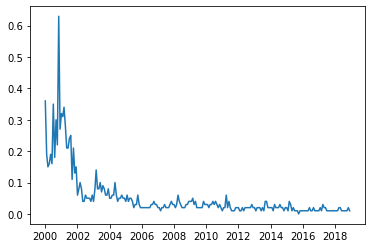

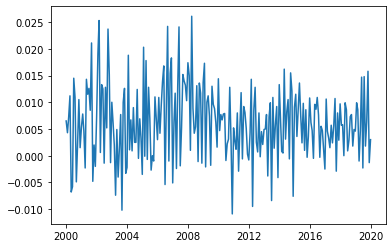

In [139]:
import matplotlib.pyplot as plt
# co_df_1['부도율(전자결제분포함,%)'].plot()
# m2_2.loc['2000-01-01':,:].plot.bar()

plt.plot(co_df_1.loc['2000-01-01':'2020-01-01'].index,co_df_1['부도율(전자결제분포함,%)'].loc['2000-01-01':'2020-01-01'])
plt.show()
plt.plot(m2_2.loc['2000-01-01':'2020-01-01'].index,m2_2.loc['2000-01-01':'2020-01-01'])
plt.show()